In [140]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report

# DBSCAN

In [141]:
history_df = pd.read_csv('history.csv')

In [142]:
# Select the features for anomaly detection
selected_features = ['travel_time', 'dwell_time', 'day_of_week', 'weekend', 'rush_hour', 'excess_travel_time']
X = history_df[selected_features]

In [143]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [144]:
# Choose DBSCAN for anomaly detection
# Adjust the parameters (eps and min_samples) based on your data characteristics
eps = 0.5  # Maximum distance between samples to be considered in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood to be considered a core point
model = DBSCAN(eps=eps, min_samples=min_samples)

In [145]:
# Fit the model
labels = model.fit_predict(X_scaled)

In [146]:
# Add the cluster labels to the DataFrame
history_df['cluster'] = labels

# Identify anomalies as samples labeled as -1 (not assigned to any cluster)
history_df['anomaly'] = (history_df['cluster'] == -1).astype(int)

# Print a classification report for evaluating model performance
print(classification_report(history_df['anomaly'], history_df['anomaly'], target_names=['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       804
     Anomaly       1.00      1.00      1.00        99

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903



In [147]:
history_df

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,outlier,cluster,anomaly
0,1,2021-10-01,07:31:27,08:15:31,Digana,Kandy,44.066667,5.466667,0.124054,4,Friday,7.50,0,1,-18.490000,Digana-Kandy,normal,0,0
1,2,2021-10-01,09:12:10,10:00:55,Kandy,Digana,48.750000,2.366667,0.048547,4,Friday,9.25,0,0,-13.806667,Kandy-Digana,normal,1,0
2,3,2021-10-01,10:42:10,11:32:30,Digana,Kandy,50.333333,9.283333,0.184437,4,Friday,10.75,0,0,-12.223333,Digana-Kandy,normal,1,0
3,4,2021-10-01,12:23:09,13:15:46,Kandy,Digana,52.616667,9.183333,0.174533,4,Friday,12.50,0,0,-9.940000,Kandy-Digana,normal,1,0
4,5,2021-10-01,16:59:16,18:17:15,Digana,Kandy,77.983333,25.566667,0.327848,4,Friday,17.00,0,1,15.426667,Digana-Kandy,anomaly,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,1099,2022-10-31,08:10:24,08:48:26,Digana,Kandy,38.033333,1.950000,0.051271,0,Monday,8.25,0,1,-24.523333,Digana-Kandy,anomaly,0,0
899,1100,2022-10-31,09:30:57,10:20:13,Kandy,Digana,49.266667,4.900000,0.099459,0,Monday,9.50,0,0,-13.290000,Kandy-Digana,normal,1,0
900,1101,2022-10-31,15:41:42,16:31:41,Digana,Kandy,49.983333,4.483333,0.089697,0,Monday,15.75,0,0,-12.573333,Digana-Kandy,normal,1,0
901,1102,2022-10-31,17:10:56,17:56:46,Kandy,Digana,45.833333,4.700000,0.102545,0,Monday,17.25,0,1,-16.723333,Kandy-Digana,normal,0,0


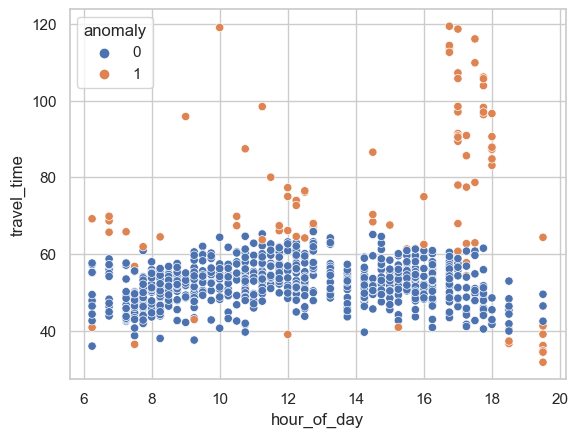

In [148]:
# plot the anomalies vs hour_of_day
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='hour_of_day', y='travel_time', hue='anomaly', data=history_df)
plt.show()

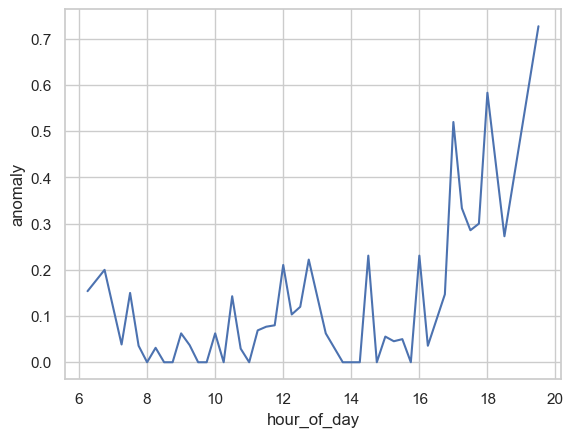

In [149]:
# percentage of anomalies vs hour_of_day
anomaly_percentage = history_df.groupby('hour_of_day')['anomaly'].mean().reset_index()
sns.lineplot(x='hour_of_day', y='anomaly', data=anomaly_percentage)
plt.show()

# Anomaly detection

In [150]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [151]:
trip_data = pd.read_csv('history.csv')
trip_data.head()

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,outlier
0,1,2021-10-01,07:31:27,08:15:31,Digana,Kandy,44.066667,5.466667,0.124054,4,Friday,7.50,0,1,-18.490000,Digana-Kandy,normal
1,2,2021-10-01,09:12:10,10:00:55,Kandy,Digana,48.750000,2.366667,0.048547,4,Friday,9.25,0,0,-13.806667,Kandy-Digana,normal
2,3,2021-10-01,10:42:10,11:32:30,Digana,Kandy,50.333333,9.283333,0.184437,4,Friday,10.75,0,0,-12.223333,Digana-Kandy,normal
3,4,2021-10-01,12:23:09,13:15:46,Kandy,Digana,52.616667,9.183333,0.174533,4,Friday,12.50,0,0,-9.940000,Kandy-Digana,normal
4,5,2021-10-01,16:59:16,18:17:15,Digana,Kandy,77.983333,25.566667,0.327848,4,Friday,17.00,0,1,15.426667,Digana-Kandy,anomaly


In [152]:
# Find rows with travel_time < 0
rows_to_drop = trip_data[trip_data['travel_time'] < 0].index

# Drop the identified rows
trip_data.drop(rows_to_drop, inplace=True)

In [153]:
trip_data.shape

(903, 17)

In [154]:
filtered_trip_data = trip_data[(trip_data['travel_time'] < 55) & (trip_data['dwell_time'] < 20)]
filtered_trip_data.shape

(580, 17)

In [155]:
#divide filtered_trip_data into two dataframes: 0.8 and 0.2
train, test = train_test_split(filtered_trip_data, test_size=0.05)

In [156]:
anomalies = trip_data[(trip_data['travel_time'] >= 55) | (trip_data['dwell_time'] >= 20)]
anomalies1,anomalies2 = train_test_split(anomalies, test_size=0.05)

In [157]:
# concat test and anomalies
test = pd.concat([test, anomalies2])

In [158]:
train.shape

(551, 17)

In [159]:
test.shape

(46, 17)

In [160]:
from sklearn.ensemble import IsolationForest
selected_features = ['travel_time', 'dwell_time', 'day_of_week', 'weekend', 'rush_hour', 'excess_travel_time']
data = trip_data[selected_features]

scaler = StandardScaler()
data = scaler.fit_transform(data)
# Create an instance of the IsolationForest
isolation_forest = IsolationForest(contamination=0.1)  # You can adjust the contamination parameter

# Fit the model to the data
isolation_forest.fit(data)

# Predict outliers
predictions = isolation_forest.predict(data)

# The predictions will be 1 for inliers (normal points) and -1 for outliers


In [161]:
# change predictions array to a column for trip_data
trip_data['outlier'] = predictions

In [162]:
# replace -1 with anomaly and 1 with normal
trip_data['outlier'] = trip_data['outlier'].map({1: 'normal', -1: 'anomaly'})

In [163]:
data = trip_data

In [164]:
data

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,outlier
0,1,2021-10-01,07:31:27,08:15:31,Digana,Kandy,44.066667,5.466667,0.124054,4,Friday,7.50,0,1,-18.490000,Digana-Kandy,normal
1,2,2021-10-01,09:12:10,10:00:55,Kandy,Digana,48.750000,2.366667,0.048547,4,Friday,9.25,0,0,-13.806667,Kandy-Digana,normal
2,3,2021-10-01,10:42:10,11:32:30,Digana,Kandy,50.333333,9.283333,0.184437,4,Friday,10.75,0,0,-12.223333,Digana-Kandy,normal
3,4,2021-10-01,12:23:09,13:15:46,Kandy,Digana,52.616667,9.183333,0.174533,4,Friday,12.50,0,0,-9.940000,Kandy-Digana,normal
4,5,2021-10-01,16:59:16,18:17:15,Digana,Kandy,77.983333,25.566667,0.327848,4,Friday,17.00,0,1,15.426667,Digana-Kandy,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,1099,2022-10-31,08:10:24,08:48:26,Digana,Kandy,38.033333,1.950000,0.051271,0,Monday,8.25,0,1,-24.523333,Digana-Kandy,anomaly
899,1100,2022-10-31,09:30:57,10:20:13,Kandy,Digana,49.266667,4.900000,0.099459,0,Monday,9.50,0,0,-13.290000,Kandy-Digana,normal
900,1101,2022-10-31,15:41:42,16:31:41,Digana,Kandy,49.983333,4.483333,0.089697,0,Monday,15.75,0,0,-12.573333,Digana-Kandy,normal
901,1102,2022-10-31,17:10:56,17:56:46,Kandy,Digana,45.833333,4.700000,0.102545,0,Monday,17.25,0,1,-16.723333,Kandy-Digana,normal


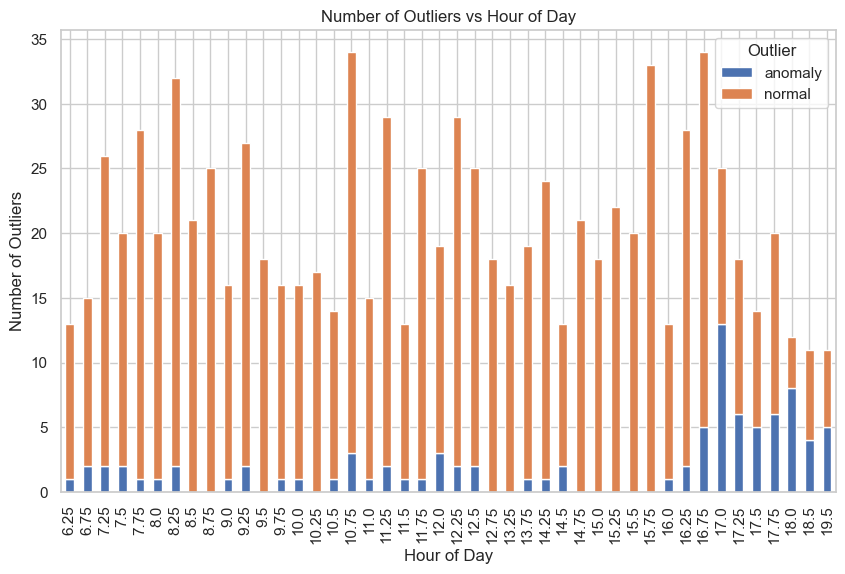

In [165]:
# Group data by 'hour_of_day' and 'outlier' and count the occurrences
grouped_data = data.groupby(['hour_of_day', 'outlier']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='hour_of_day', columns='outlier', values='count')

# Create the bar chart using Matplotlib
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers vs Hour of Day')

# Show the legend
plt.legend(title='Outlier')

# Show the plot
plt.show()


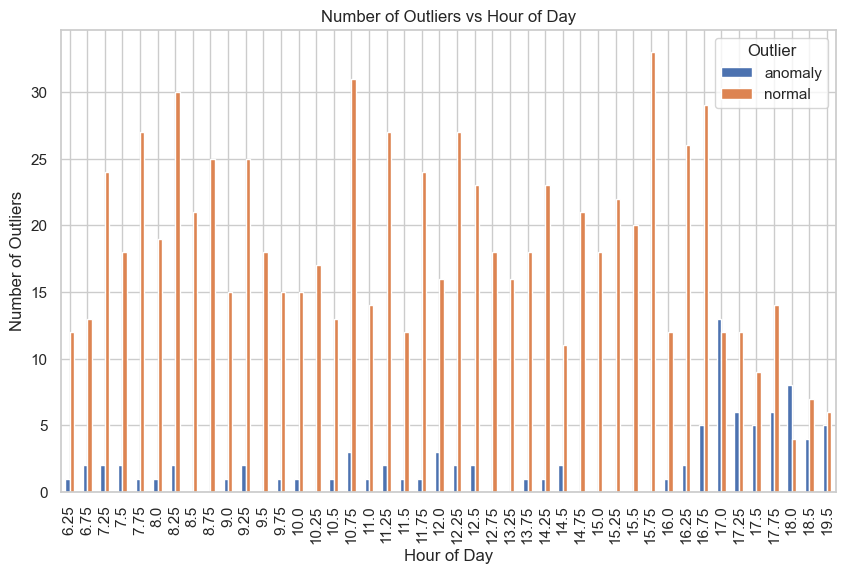

In [166]:
# Group data by 'hour_of_day' and 'outlier' and count the occurrences
grouped_data = data.groupby(['hour_of_day', 'outlier']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='hour_of_day', columns='outlier', values='count')

# Create the clustered bar chart using Matplotlib
pivot_data.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers vs Hour of Day')

# Show the legend
plt.legend(title='Outlier')

# Show the plot
plt.show()

In [167]:
trip_data.to_csv('history.csv', index=False)